In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

%matplotlib inline

# Spotify Song Attributes

In [2]:
data = pd.read_csv("data.csv", encoding='latin-1', index_col = 0)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null int64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(9), int64(5), object(2)
memory usage: 267.9+ KB


In [4]:
data['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [5]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
# scatter = pd.plotting.scatter_matrix(data, figsize=(15, 15), diagonal='hist')

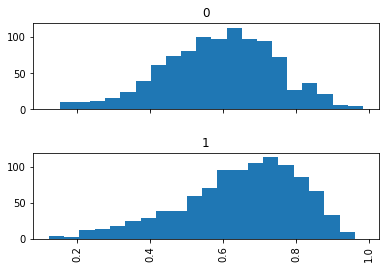

In [7]:
ax = data.hist(column='danceability', by='target', bins=20, layout=(2,1), sharex=True, sharey=True)

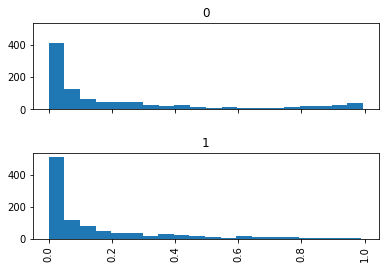

In [8]:
ax = data.hist(column='acousticness', by='target', bins=20, layout=(2,1), sharex=True, sharey=True)

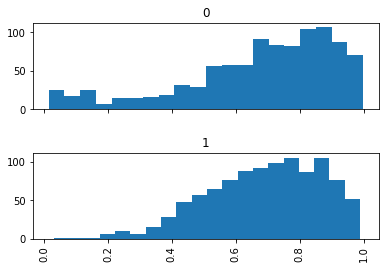

In [9]:
ax = data.hist(column='energy', by='target', bins=20, layout=(2,1), sharex=True, sharey=True)

In [10]:
data = data.drop(['song_title', 'artist'], axis=1)

In [11]:
# apply MinMaxScaler to numeric features
data['duration_ms'] = MinMaxScaler().fit(data[['duration_ms']]).transform(data[['duration_ms']])
data['loudness'] = MinMaxScaler().fit(data[['loudness']]).transform(data[['loudness']])
data['tempo'] = MinMaxScaler().fit(data[['tempo']]).transform(data[['tempo']])
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,0.190735,0.434,0.021900,2,0.1650,0.741141,1,0.4310,0.596033,4,0.286,1
1,0.1990,0.743,0.314481,0.359,0.006110,1,0.1370,0.692162,1,0.0794,0.654474,4,0.588,1
2,0.0344,0.838,0.171624,0.412,0.000234,2,0.1590,0.791369,1,0.2890,0.158539,4,0.173,1
3,0.6040,0.494,0.185488,0.338,0.510000,5,0.0922,0.544709,1,0.0261,0.225162,4,0.230,1
4,0.1800,0.678,0.381202,0.561,0.512000,5,0.4390,0.654132,0,0.0694,0.735659,4,0.904,1


In [12]:
# apply get dummies to categorial features
data = pd.get_dummies(data, columns=['key', 'mode', 'time_signature'], drop_first=False)

data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.0102,0.833,0.190735,0.434,0.021900,0.1650,0.741141,0.4310,0.596033,0.286,...,0,0,0,0,0,1,0,0,1,0
1,0.1990,0.743,0.314481,0.359,0.006110,0.1370,0.692162,0.0794,0.654474,0.588,...,0,0,0,0,0,1,0,0,1,0
2,0.0344,0.838,0.171624,0.412,0.000234,0.1590,0.791369,0.2890,0.158539,0.173,...,0,0,0,0,0,1,0,0,1,0
3,0.6040,0.494,0.185488,0.338,0.510000,0.0922,0.544709,0.0261,0.225162,0.230,...,0,0,0,0,0,1,0,0,1,0
4,0.1800,0.678,0.381202,0.561,0.512000,0.4390,0.654132,0.0694,0.735659,0.904,...,0,0,0,0,1,0,0,0,1,0


In [13]:
# data.loc[data.acousticness < 0.55, 'acousticness'] = 0
# data.loc[data.acousticness >= 0.55, 'acousticness'] = 1

# data.loc[data.energy < 0.4, 'energy'] = 0
# data.loc[data.energy >= 0.4, 'energy'] = 1

# data.head()

In [14]:
train, test = train_test_split(data, train_size=0.75, random_state=54321)

train, dev = train_test_split(train, train_size=0.7, random_state=54321)

C:\Users\innbal.menashri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
test['target'].value_counts()

1    264
0    241
Name: target, dtype: int64

In [16]:
train['target'].value_counts()

1    529
0    529
Name: target, dtype: int64

In [17]:
dev['target'].value_counts()

1    227
0    227
Name: target, dtype: int64

In [18]:
#Fit to  the decision tree model 
dt = DecisionTreeClassifier(max_depth=5,
                                   min_samples_split=10,
                                   min_samples_leaf=10)
X = train.drop('target', axis=1)
y = train.target
dt.fit(X, y)
# Assest the model 
train['pred'] = dt.predict(X)
print ("DT features importance ")
print (pd.Series(dt.feature_importances_,
          index=X.columns))
cm = confusion_matrix(y_true=train.target,
                      y_pred=train.pred)
print ( '********** DC confusion matrix (train)*************')
print (pd.DataFrame(cm,
             index=dt.classes_,
             columns=dt.classes_))

print ('accuracy(train):' , accuracy_score(y_true=train.target, y_pred=train.pred))
print ( '********** DC classification report (train) *************')
print (classification_report(y_true=train.target,
                            y_pred=train.pred))

# Validate the model on test 
X = dev.drop('target', axis=1)
y = dev.target
dev['pred'] = dt.predict(X)
print ('accuracy(dev):' , accuracy_score(y_true=dev.target, y_pred=dev.pred))
print ( '********** DC classification report (test) *************')
print (classification_report(y_true=dev.target,
                            y_pred=dev.pred))

DT features importance 
acousticness        0.030701
danceability        0.100449
duration_ms         0.035004
energy              0.113532
instrumentalness    0.275481
liveness            0.014441
loudness            0.161331
speechiness         0.165376
tempo               0.054234
valence             0.049451
key_0               0.000000
key_1               0.000000
key_2               0.000000
key_3               0.000000
key_4               0.000000
key_5               0.000000
key_6               0.000000
key_7               0.000000
key_8               0.000000
key_9               0.000000
key_10              0.000000
key_11              0.000000
mode_0              0.000000
mode_1              0.000000
time_signature_1    0.000000
time_signature_3    0.000000
time_signature_4    0.000000
time_signature_5    0.000000
dtype: float64
********** DC confusion matrix (train)*************
     0    1
0  411  118
1  100  429
accuracy(train): 0.7939508506616257
********** DC classificat

### With pipeline

The pipeline allows us to define a "chain" of transformers (and potentially an estimator at the end), which work as a single unit.

In [ ]:
steps = [('scaler', scaler), 
         ('selector', selector),
         ('pca', pca_transformer), 
         ('dt', dt_clf)]
my_pipeline = Pipeline(steps)

When we _fit()_ a pipeline, sklearn actually applies a chain of fit-transform operations, where the output of the first transformer is the input for the second one, the output of the second is the input of the third and so on. Pipelines also have a _transform()_ method, which applies the _transform()_ of the final transformer in the pipeline, and thus produces the transformed output.

Similarly, if the last step of the piepeline is an estimator (only the final step is allowed to be an estimator), then the pipeline has a _predict()_ method, which applies _fit()_ and _transform()_ for each of the transformers, and applies _fit()_ and _predict()_ to the estimator.

In [ ]:
my_pipeline.fit(X_train, y_train)

In [ ]:
y_pred = my_pipeline.predict(X_train)

In [ ]:
f1_score(y_true=y_train, y_pred=y_pred)

It is helpful to think about a pipeline as either a _Transformer_ instance (if the last step is a transformer) or an _Estimator_ instance (if the last step is an estimator). Understanding that makes it rather intuitive to use a pipeline like any other element we've seen earlier, allowing scoring, cross-validation, grid-search, etc.

In [ ]:
results = cross_val_score(my_pipeline, X_train, y_train, 
                          scoring='f1', cv=10)
show_results(scores)

## Applying grid search

As said above, it is possible to apply grid search to a pipeline. Actually, each of the pipeline steps can be accessed, and each of their (hyper)parameters can be tuned. This is done using a special syntax, where the name of the step and the name of the hyperparameter are separated by a double underline, like this: **estimator__parameter**.

In [ ]:
params = {'selector__k': range(5, 9),
          'pca__n_components': range(1, 5),
          'dt__max_depth': range(1, 5)}
gs = GridSearchCV(my_pipeline, param_grid=params)
gs.fit(X_train, y_train)

In [ ]:
best_clf = gs.best_estimator_
scores = cross_val_score(best_clf, X_train, y_train, scoring='f1', cv=10)
show_results(scores)

# Example 2

Very often you wish to apply different transformations to different columns, and then "collect" all results into one final DataFrame. These two tasks can be done with **_FunctionTransformer_** and **_FeatureUnion_** respectively. Moreover we will see how several pipelines can be combined into a single pipeline.

## The data

The _Occupancy_ data records several parameters of an office, and our task is to predict whether someone is in the room. This is important e.g. for saving power in office buildings (More details can be found [here][occ]).

[occ]: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+ "Occupancy detection - UCI"

In [ ]:
occupancy = read_csv('occupancy.txt')
occupancy.drop('date', axis=1, inplace=True)
occupancy.head()

In [ ]:
X = occupancy.drop('Occupancy', axis=1)
y = occupancy['Occupancy']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.7, random_state=0)

Let's have a look at the data.

In [ ]:
hists = occupancy.hist(bins=100, layout=(2, 3), figsize=(10,7))

## Preparing the pipeline

After inspecting the data we wish to do the following:

* Temperature - Standard scaling
* Humidity - Max-abs scaling
* Light - Binarizing
* CO2 - Binarizing
* HumidityRatio - Max-abs scaling

For that we write the relevant FunctionTransformers and their corresponding functions:

In [ ]:
def get_cols_for_ss(df):
    return df[['Temperature']]

ss_selector = FunctionTransformer(func=get_cols_4_ss, validate=False)

In [ ]:
def get_cols_for_mas(df):
    return df[['Humidity', 'HumidityRatio']]

mas_selector = FunctionTransformer(func=get_cols_4_mas, validate=False)

In [ ]:
def get_light(df):
    return df[['Light']]

light_selector = FunctionTransformer(func=get_light, validate=False)

In [ ]:
def get_co2(df):
    return df[['CO2']]

co2_selector = FunctionTransformer(func=get_co2, validate=False)

> **NOTE:** 'ss' stands for 'standard scaler', 'mas' for 'max-abs-scaler', and 'bin' for 'binarizer'.

> **NOTE:** The argument _validate_ has to be set to _False_.

In [ ]:
ss_pipeline = Pipeline([('ss_selector', ss_selector), 
                        ('ss', StandardScaler())])
mas_pipeline = Pipeline([('mas_selector', mas_selector), 
                         ('mas', MaxAbsScaler())])
light_pipeline = Pipeline([('light_selector', light_selector), 
                           ('light_bin', Binarizer())])
co2_pipeline = Pipeline([('co2_selector', co2_selector), 
                         ('co2_bin', Binarizer())])

In [ ]:
trans_pipeline = FeatureUnion([('ss_pipeline', ss_pipeline), 
                               ('mas_pipeline', mas_pipeline), 
                               ('light_pipeline', light_pipeline), 
                               ('co2_pipeline', co2_pipeline)])

> **NOTE:** There are conveniency functions called _make_\__pipeline()_ and _make_\__union()_ that create objects assiging each step a name equivalent to the step object name.

In [ ]:
prepared_train = trans_pipeline.fit_transform(X_train)
prepared_train

Finally, we add a decision-tree classifier as the last step of the full pipeline.

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
full_pipeline = Pipeline([('trans_pipeline', trans_pipeline), 
                          ('dt_clf', dt_clf)])

## Modelling

In [ ]:
full_pipeline.fit(X_train, y_train)
y_train_pred = full_pipeline.predict(X_train)
y_test_pred = full_pipeline.predict(X_test)

In [ ]:
f1_score(y_train, y_train_pred)

In [ ]:
f1_score(y_test, y_test_pred)